# WS 15 Schwellenwert für Accuracy

* `.predict_proba()` gibt bei allen Klassifikatoren die Wahrscheinlichkeit für die Zugehörigkeit zu den einlenen Klassen zurück, `predict()` dagegen die wahrscheinlichtste Klasse selber
* für Zwei-Klassen Fragestellungen bedeutet dies, dass bei einer Wahrscheinlickkeit (proba) `> 0.5` für die erste Klasse diese zurückgegeben wird, andernfalls die zweite Klasse, `0.5` ist somit ein scheinbar willkürlicher Schwellenwert
* untersuchen Sie die Auswirkung anderer Schwellenwerte auf die Accuracy mit `RandomForestClassifier` auf den aufbereiteten Bankkunden-Datan

* vorgeschlagenes Vorgehen:
  * trainieren eines RandomForestClassifier mit den vorbereiteten Bankkundendaten (Trainingsdaten)
  * bestimmen der Wahrscheinlichkeit für jede Beobachtung der entsprechenden Testdaten zur Klasse 'no'
  * erstellen einens Range der zu untersuchenden Schwellenwerte, z.B. mit np.arange()
  * in einem Loop über alle Werte dieses Ranges
    * `y_pred` für den jeweiligen Schwellenwert berechnen (wiederum als `['no', 'yes']`)
    * `accuracy_score()` der jeweiligen Prediction (und sammeln in einer Liste)
  * ausgeben des besten Score-Wertes und des zugehörigen Schwellenwertes in der Konsole
  * visualisieren der Ergebnisse auch als Lineplot  

In [3]:
## prepare env, read and prepare data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

codepath = '.././2_code' ## for import of user defined module
datapath = '../../3_data'
#codepath = '../2_code' ## for import of user defined module
#datapath = '../3_data'

from sys import path; path.insert(1, codepath)
from os import chdir; chdir(datapath)

from bfh_cas_pml import prep_data
X_train, X_test, y_train, y_test = prep_data('bank_data_prep.csv', target='y', seed=1234)

In [4]:
## train a model
from sklearn.ensemble import RandomForestClassifier 
model = RandomForestClassifier(random_state=1234)
model.fit(X_train, y_train) 

## prediction using .predict_proba()
y_pred_p_no = model.predict_proba(X_test)[:, 0]

In [5]:
## inspect different threshold values
from sklearn.metrics import accuracy_score

thresholds = np.arange(0, 1.01, 0.01)
scores = []

for threshold in thresholds:
    y_pred = np.where(y_pred_p_no > threshold, 'no', 'yes')
    scores.append(accuracy_score(y_test, y_pred))

In [6]:
## results
print('max accuracy %6.4f for threshold %4.2f' % (
    max(scores),
    thresholds[scores.index(max(scores))]))

max accuracy 0.8792 for threshold 0.56


C:\Users\werne\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\werne\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


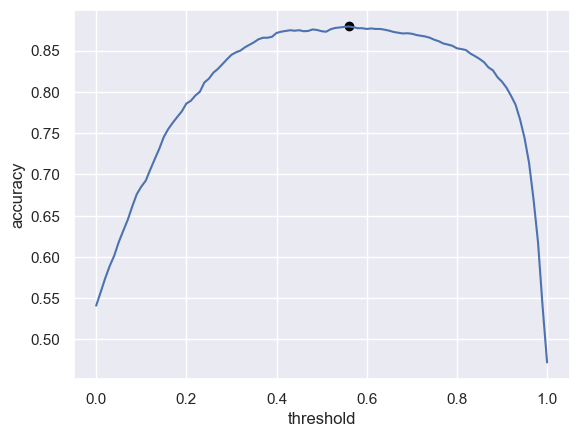

In [7]:
## viszalization
sns.lineplot(x=thresholds, y=scores)
plt.scatter(x=thresholds[scores.index(max(scores))], y=max(scores), color="black")
plt.xlabel('threshold')
plt.ylabel('accuracy');